In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('MSFT.csv')

In [36]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9657,2024-07-10,461.220001,466.459991,458.859985,466.250000,466.250000,18196100
9658,2024-07-11,462.980011,464.779999,451.549988,454.700012,454.700012,23111200
9659,2024-07-12,454.329987,456.359985,450.649994,453.549988,453.549988,16311300
9660,2024-07-15,453.299988,457.260010,451.429993,453.959991,453.959991,14414400


In [37]:
df = df[['Date', 'Close']]

In [38]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9657,2024-07-10,466.250000
9658,2024-07-11,454.700012
9659,2024-07-12,453.549988
9660,2024-07-15,453.959991


In [39]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

In [40]:
df['Date'] = df['Date'].apply(str_to_datetime)

<ipython-input-40-82fc7f804c29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [41]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9657   2024-07-10
9658   2024-07-11
9659   2024-07-12
9660   2024-07-15
9661   2024-07-16
Name: Date, Length: 9662, dtype: datetime64[ns]

In [42]:
df.index = df.pop('Date')

In [43]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-07-10,466.250000
2024-07-11,454.700012
2024-07-12,453.549988


In [44]:
import matplotlib.pyplot as plt

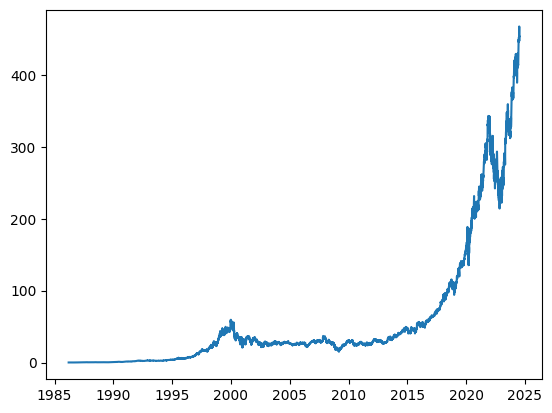

In [45]:
plt.plot(df.index, df['Close'])

In [74]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-03-25',
                                '2024-07-16',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-03-25,273.779999,272.290009,277.660004,280.570007
1,2023-03-28,277.660004,280.570007,276.380005,275.230011
2,2023-03-29,280.570007,276.380005,275.230011,280.510010
3,2023-03-30,276.380005,275.230011,280.510010,284.049988
4,2023-03-31,275.230011,280.510010,284.049988,288.299988
...,...,...,...,...,...
323,2024-07-10,467.559998,466.239990,459.540009,466.250000
324,2024-07-11,466.239990,459.540009,466.250000,454.700012
325,2024-07-12,459.540009,466.250000,454.700012,453.549988
326,2024-07-15,466.250000,454.700012,453.549988,453.959991


In [75]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((328,), (328, 3, 1), (328,))

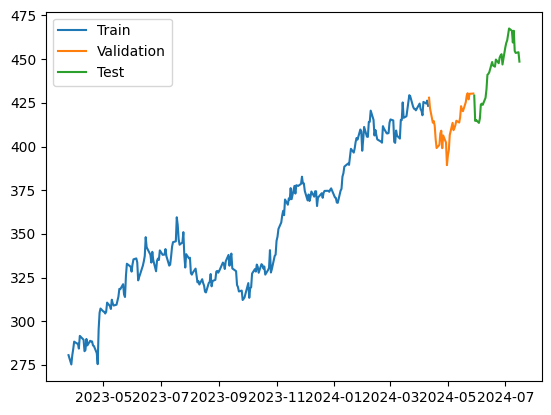

In [76]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(128),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.002),
              metrics = ['mean_absolute_error'])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
9/9 [==============================] - 5s 103ms/step - loss: 125189.2734 - mean_absolute_error: 351.4897 - val_loss: 170105.6719 - val_mean_absolute_error: 412.2903
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 124111.7969 - mean_absolute_error: 349.9532 - val_loss: 167772.1719 - val_mean_absolute_error: 409.4506
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 121145.6250 - mean_absolute_error: 345.6906 - val_loss: 162049.8438 - val_mean_absolute_error: 402.4022
Epoch 4/100
9/9 [==============================] - 0s 16ms/step - loss: 114292.7109 - mean_absolute_error: 335.6339 - val_loss: 148917.0938 - val_mean_absolute_error: 385.7387
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 98402.0703 - mean_absolute_error: 310.9301 - val_loss: 120260.7344 - val_mean_absolute_error: 346.6089
Epoch 6/100
9/9 [==============================] - 0s 17ms/step - loss: 67751.0703 - mean_absolute_error: 256.4927 - val

9/9 [==============================] - 1s 4ms/step


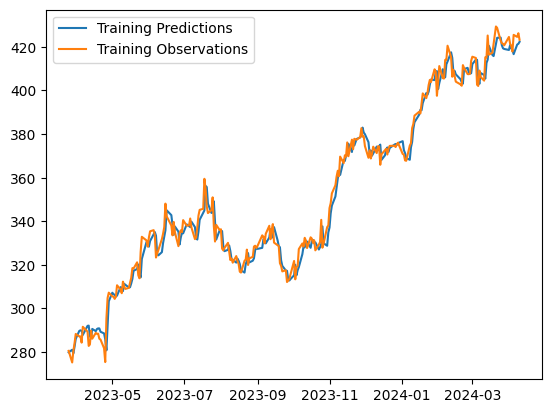

In [78]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 9ms/step


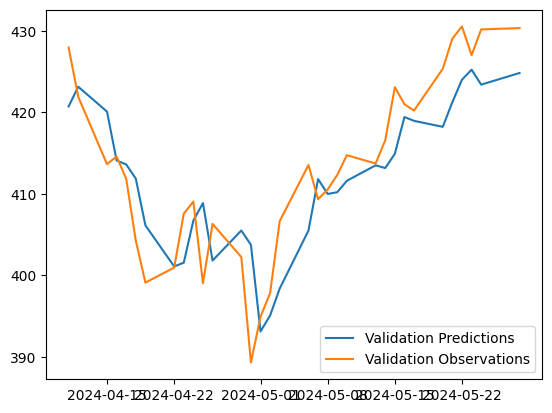

In [79]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 8ms/step


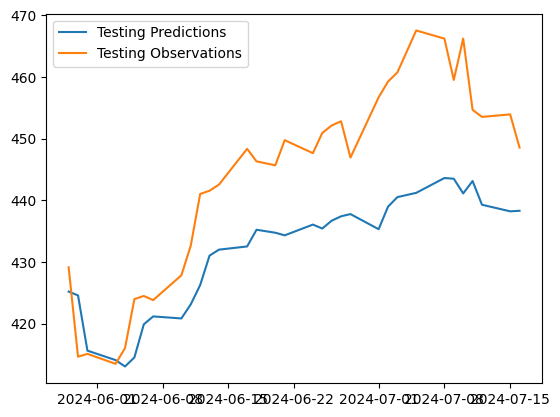

In [80]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

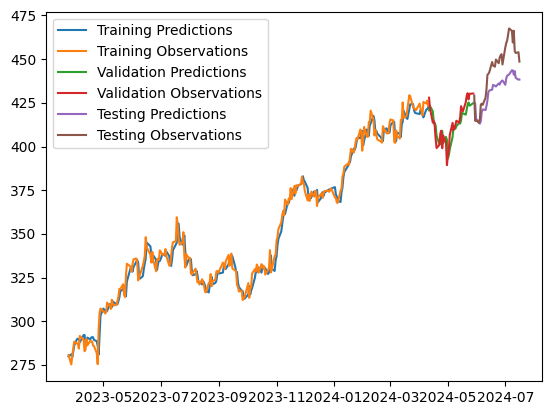

In [81]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [85]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  print(next_prediction)
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction
  print(last_window)

1/1 [==============================] - 0s 59ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 108ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 62ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 54ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 54ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 83ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 52ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 68ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 162ms/step
[422.32742]
[[425.52   ]
 [424.59   ]
 [422.32742]]
1/1 [==============================] - 0s 136ms/step
[422.3274

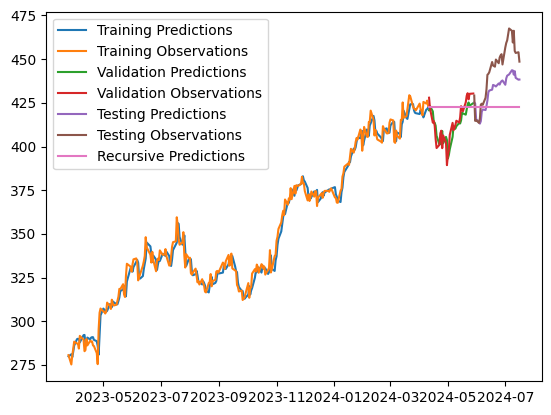

In [83]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [88]:
import numpy as np
from copy import deepcopy

# Assuming dates_val and dates_test are defined numpy arrays
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

last_window = deepcopy(X_train[-1])  # Deep copy of the last element in X_train

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()  # Predicting the next value
    recursive_predictions.append(next_prediction)
    last_window = np.roll(last_window, -1)  # Shift elements left
    last_window[-1] = next_prediction  # Insert the new prediction at the end
    print(last_window)  # Print the updated window

# Note: Ensure X_train is a numpy array and model has a predict method


1/1 [==============================] - 0s 61ms/step
[[424.59   ]
 [426.28   ]
 [422.32742]]
1/1 [==============================] - 0s 55ms/step
[[426.28   ]
 [422.32742]
 [420.15637]]
1/1 [==============================] - 0s 50ms/step
[[422.32742]
 [420.15637]
 [418.35495]]
1/1 [==============================] - 0s 74ms/step
[[420.15637]
 [418.35495]
 [416.94073]]
1/1 [==============================] - 0s 81ms/step
[[418.35495]
 [416.94073]
 [415.7949 ]]
1/1 [==============================] - 0s 48ms/step
[[416.94073]
 [415.7949 ]
 [414.8562 ]]
1/1 [==============================] - 0s 54ms/step
[[415.7949 ]
 [414.8562 ]
 [414.07843]]
1/1 [==============================] - 0s 52ms/step
[[414.8562 ]
 [414.07843]
 [413.4284 ]]
1/1 [==============================] - 0s 47ms/step
[[414.07843]
 [413.4284 ]
 [412.88113]]
1/1 [==============================] - 0s 40ms/step
[[413.4284 ]
 [412.88113]
 [412.4177 ]]
1/1 [==============================] - 0s 42ms/step
[[412.88113]
 [412.4177 ]
 [

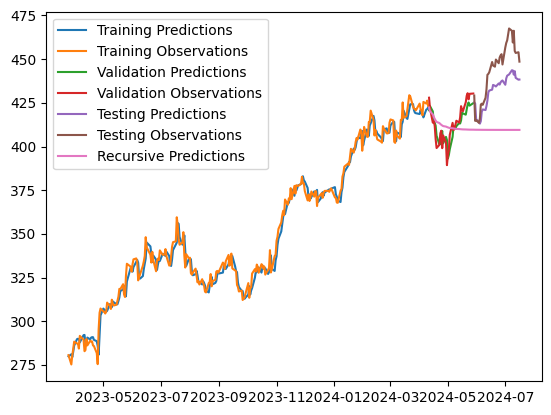

In [89]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])